# Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Training Data

In [3]:
df_train = pd.read_csv("../files/data/SINGLE_CRACK/CORNER_CRACK_COUNTERSUNK_HOLE/CORNER_CRACK_CS2_THROUGH_CS_THICKNESS_TRAIN.csv")
df_train

,c_index,W/R,a/c,a/t,r/t,b/t,phi,K-T,K-B,K-P
0,0.0,40.0,0.25,1.1,1.000,0.5,0.041537,7.285690,4.192039,0.432282
1,0.0,40.0,0.25,1.1,1.000,0.5,0.044801,7.314557,4.154743,0.434244
2,0.0,40.0,0.25,1.1,1.000,0.5,0.048064,7.347603,4.119193,0.436539
3,0.0,40.0,0.25,1.1,1.000,0.5,0.051328,7.384716,4.084388,0.439102
4,0.0,40.0,0.25,1.1,1.000,0.5,0.054591,7.425388,4.049786,0.441915
...,...,...,...,...,...,...,...,...,...,...
2151931,24962.0,2.8,10.00,6.5,0.667,0.5,0.922291,15.306791,-5.776021,6.121477
2151932,24962.0,2.8,10.00,6.5,0.667,0.5,0.929389,15.237397,-5.942797,6.091530
2151933,24962.0,2.8,10.00,6.5,0.667,0.5,0.936487,15.157851,-6.108922,6.055041
2151934,24962.0,2.8,10.00,6.5,0.667,0.5,0.943585,15.061593,-6.273593,6.012689


In [4]:
# Get unique combinations of the first four columns
train_combinations = df_train.iloc[:, 1:5].drop_duplicates().to_numpy()

print(len(train_combinations))

16812


In [5]:
print("Different W/R values: ", np.unique(train_combinations[:,0], axis=0))
print("Different a/c values: ", np.unique(train_combinations[:,1], axis=0))
print("Different a/t values: ", np.unique(train_combinations[:,2], axis=0))
print("Different r/t values: ", np.unique(train_combinations[:,3], axis=0))
print("Different phi values: ", np.unique(df_train.iloc[:,6], axis=0))

Different W/R values:  [  2.4   2.6   2.8   3.2   3.6   4.    4.6   5.2   5.8   6.4   7.    8.
   9.   10.   12.   16.   20.   30.   40.  100. ]
Different a/c values:  [ 0.1     0.125   0.1667  0.2     0.25    0.333   0.3333  0.5     0.6667
  0.667   0.75    0.7502  0.8     0.9     0.9001  1.      1.1111  1.25
  1.333   1.3333  1.4993  1.5     2.      3.      3.003   5.9988  6.
 10.    ]
Different a/t values:  [ 0.6   0.7   0.8   0.9   0.95  1.1   1.25  1.4   1.8   2.4   3.2   4.5
  6.5  10.   15.  ]
Different r/t values:  [0.2   0.333 0.5   0.667 1.    1.5   2.    3.    5.   ]
Different phi values:  [0.0357155  0.0358326  0.03584893 ... 1.51290061 1.51290351 1.51290809]


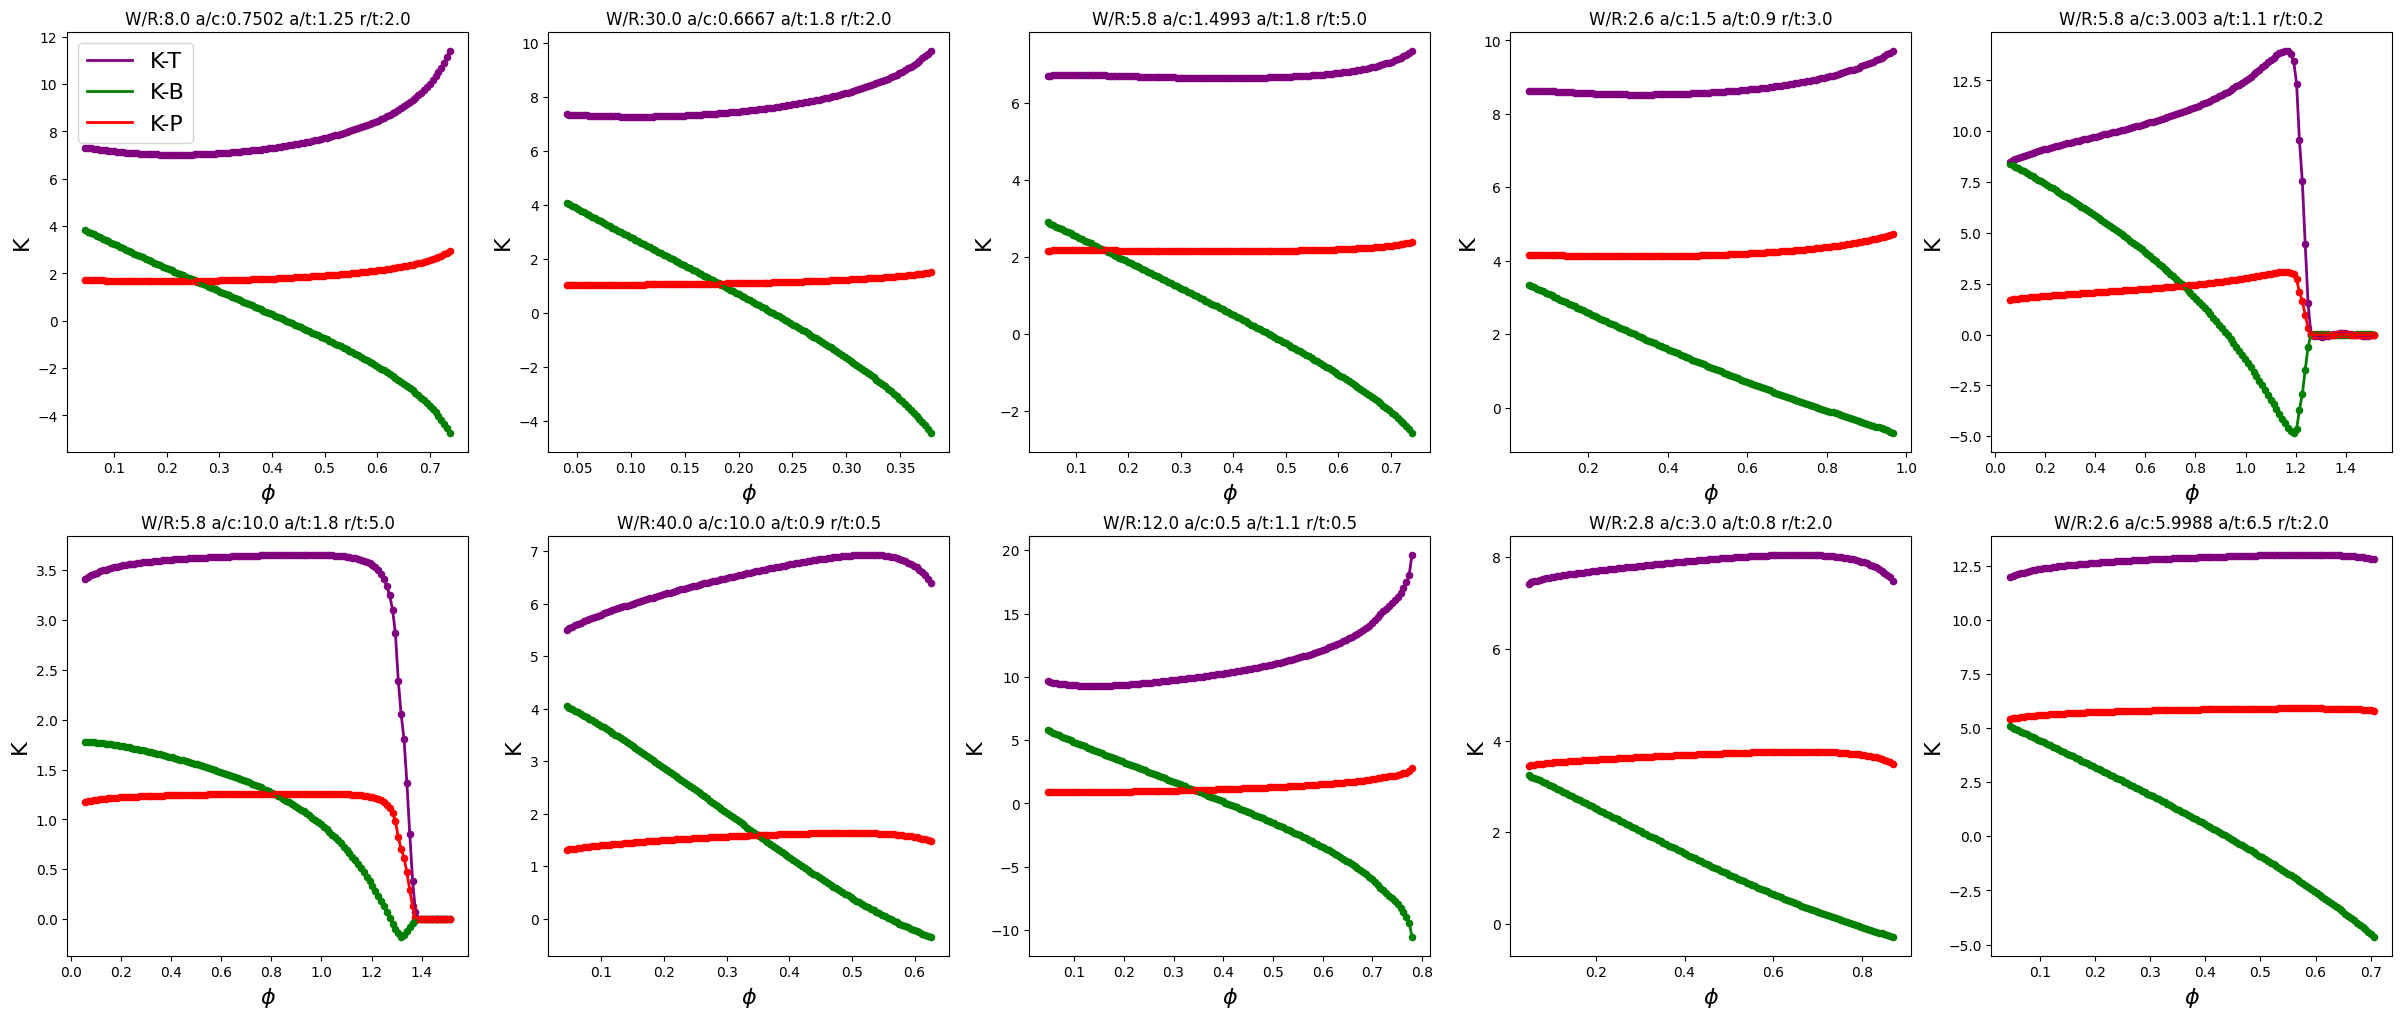

In [13]:
d = df_train.to_numpy()

num_crack = np.unique(d[:,0])

np.random.seed(15)
fig, axs = plt.subplots(2, 5, figsize=(30,12))
for i in range(2):
    for j in range(5):
        idx = np.random.randint(0, len(num_crack))
        data = d[idx*128:idx*128+128]
        W_R = np.unique(data[:,1])
        a_c = np.unique(data[:,2])
        a_t = np.unique(data[:,3])
        r_t = np.unique(data[:,4])

        assert len(W_R) == 1
        assert len(a_c) == 1
        assert len(a_t) == 1
        assert len(r_t) == 1

        axs[i,j].plot(data[:,-4], data[:,-3], label="K-T", color='purple', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-4], data[:,-3], color='purple', s=20)

        axs[i,j].plot(data[:,-4], data[:,-2], label="K-B", color='green', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-4], data[:,-2], color='green', s=20)

        axs[i,j].plot(data[:,-4], data[:,-1], label="K-P", color='red', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-4], data[:,-1], color='red', s=20)

        axs[i,j].set_title("W/R:{} a/c:{} a/t:{} r/t:{}".format(W_R[0], a_c[0], a_t[0], r_t[0]))
        axs[i,j].set_ylabel("K", fontsize=16)
        axs[i,j].set_xlabel(r"$\phi$", fontsize=16)
        
        if i == 0 and j == 0:
            axs[i,j].legend(fontsize=16)

plt.show()

# Testing Data

In [14]:
df_test = pd.read_csv("../files/data/SINGLE_CRACK/CORNER_CRACK_COUNTERSUNK_HOLE/CORNER_CRACK_CS2_THROUGH_CS_THICKNESS_TEST.csv")
df_test

,c_index,W/R,a/c,a/t,r/t,b/t,phi,K-T,K-B,K-P
0,13.0,40.0,0.5,1.4,1.000,0.5,0.041134,7.970784,4.754799,0.672829
1,13.0,40.0,0.5,1.4,1.000,0.5,0.044196,7.952257,4.686180,0.671862
2,13.0,40.0,0.5,1.4,1.000,0.5,0.047259,7.934633,4.618272,0.670968
3,13.0,40.0,0.5,1.4,1.000,0.5,0.050321,7.917981,4.550931,0.670156
4,13.0,40.0,0.5,1.4,1.000,0.5,0.053383,7.902604,4.483863,0.669463
...,...,...,...,...,...,...,...,...,...,...
717435,24961.0,6.4,10.0,10.0,0.667,0.5,0.720029,10.175483,-5.079700,2.221446
717436,24961.0,6.4,10.0,10.0,0.667,0.5,0.725509,10.164997,-5.210541,2.218070
717437,24961.0,6.4,10.0,10.0,0.667,0.5,0.730989,10.155495,-5.342618,2.214248
717438,24961.0,6.4,10.0,10.0,0.667,0.5,0.736470,10.146219,-5.476238,2.210067


In [15]:
# Get unique combinations of the first four columns
test_combinations = df_test.iloc[:, 1:5].drop_duplicates().to_numpy()

print(len(test_combinations))

5605


In [16]:
print("Different W/R values: ", np.unique(test_combinations[:,0], axis=0))
print("Different a/c values: ", np.unique(test_combinations[:,1], axis=0))
print("Different a/t values: ", np.unique(test_combinations[:,2], axis=0))
print("Different r/t values: ", np.unique(test_combinations[:,3], axis=0))
print("Different phi values: ", np.unique(df_test.iloc[:,6], axis=0))

Different W/R values:  [  2.4   2.6   2.8   3.2   3.6   4.    4.6   5.2   5.8   6.4   7.    8.
   9.   10.   12.   16.   20.   30.   40.  100. ]
Different a/c values:  [ 0.1     0.125   0.1667  0.2     0.25    0.333   0.3333  0.5     0.6667
  0.667   0.75    0.7502  0.8     0.9     0.9001  1.      1.1111  1.25
  1.333   1.3333  1.4993  1.5     2.      3.      3.003   5.9988  6.
 10.    ]
Different a/t values:  [ 0.6   0.7   0.8   0.9   0.95  1.1   1.25  1.4   1.8   2.4   3.2   4.5
  6.5  10.   15.  ]
Different r/t values:  [0.2   0.333 0.5   0.667 1.    1.5   2.    3.    5.   ]
Different phi values:  [0.0357155  0.0358326  0.03584893 ... 1.51290061 1.51290351 1.51290809]


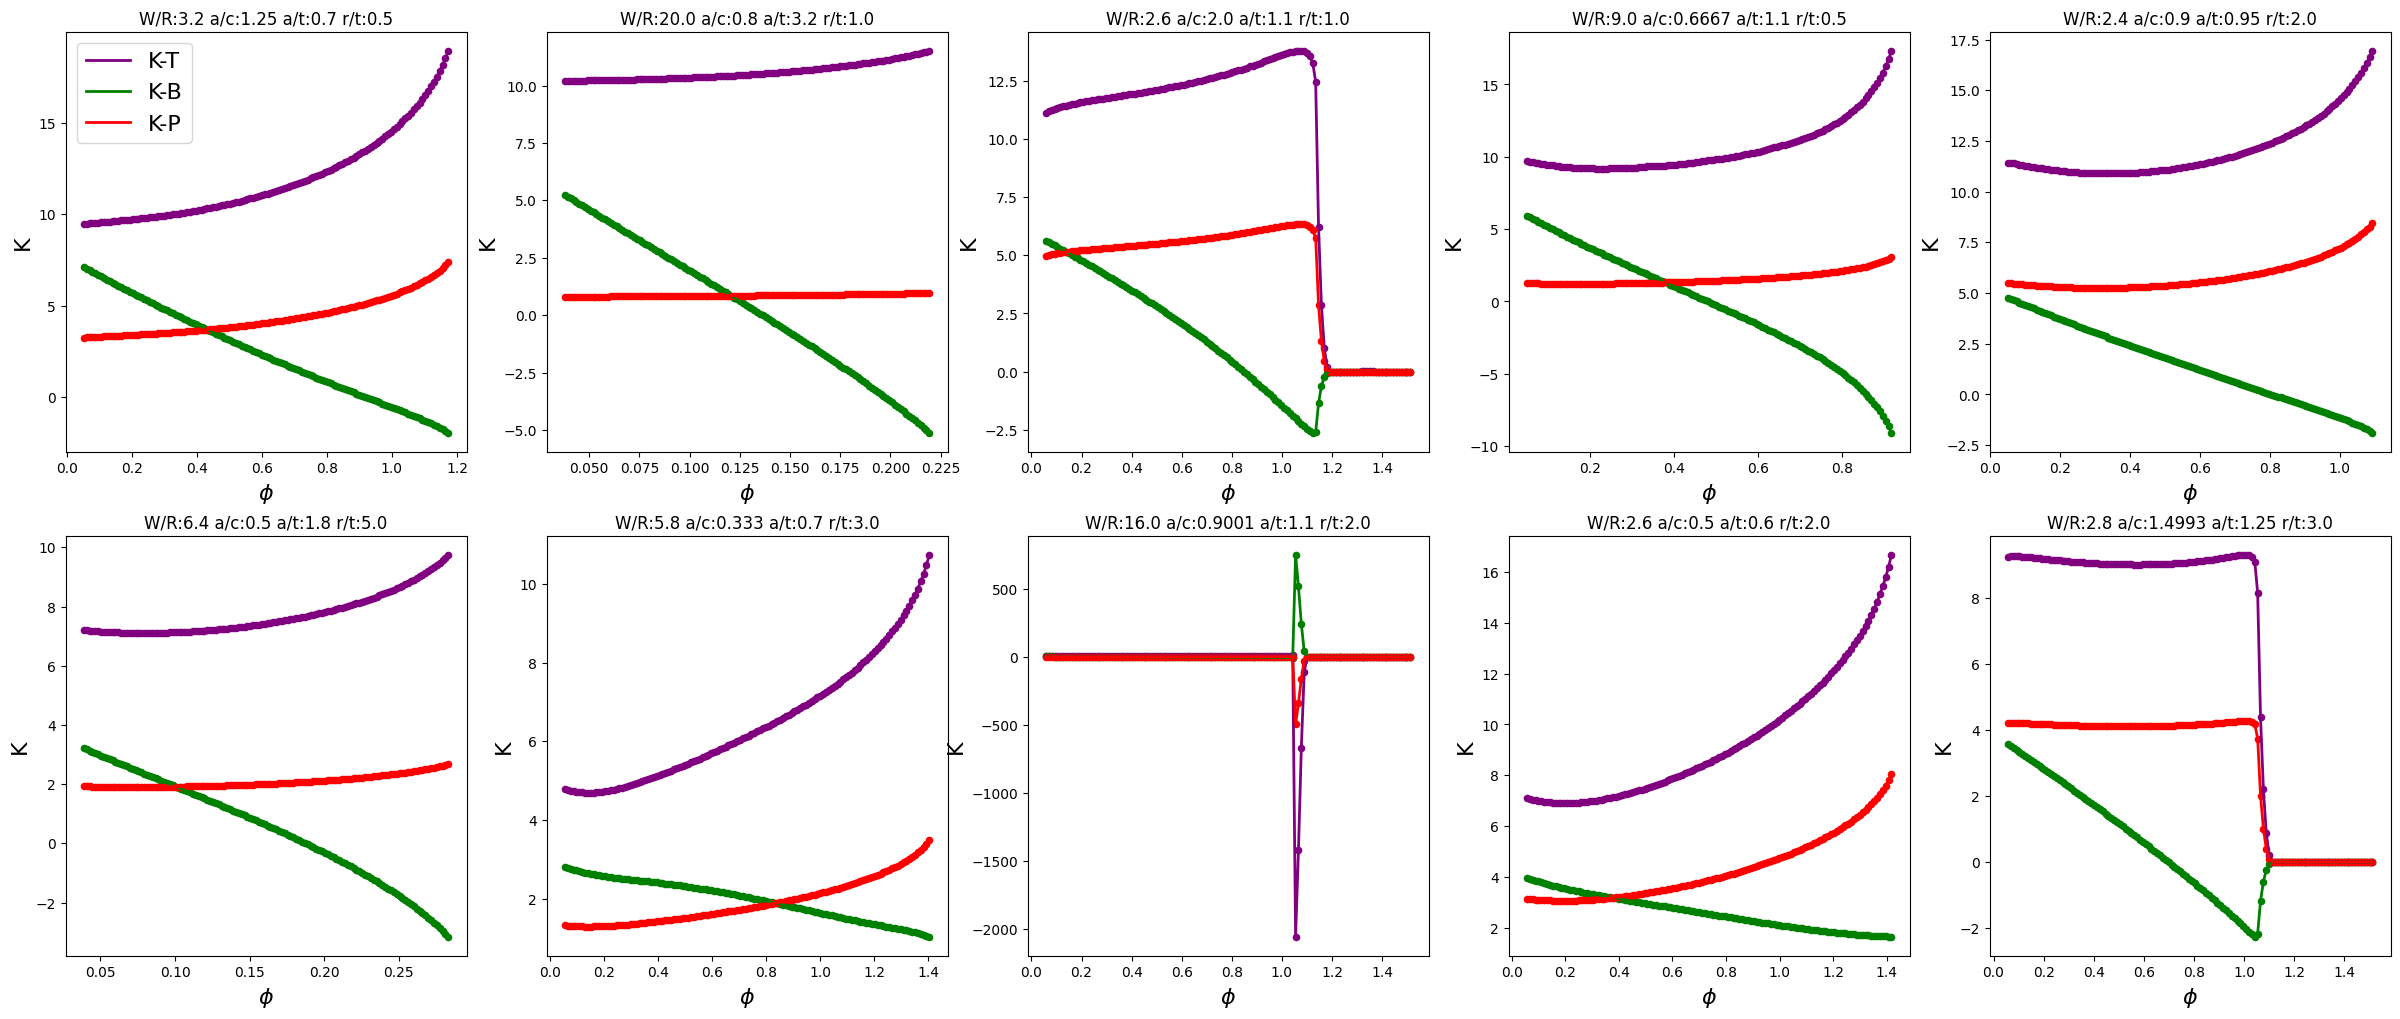

In [17]:
d = df_test.to_numpy()

num_crack = np.unique(d[:,0])

np.random.seed(100)
fig, axs = plt.subplots(2, 5, figsize=(30,12))
for i in range(2):
    for j in range(5):
        idx = np.random.randint(0, len(num_crack))
        data = d[idx*128:idx*128+128]
        W_R = np.unique(data[:,1])
        a_c = np.unique(data[:,2])
        a_t = np.unique(data[:,3])
        r_t = np.unique(data[:,4])

        assert len(W_R) == 1
        assert len(a_c) == 1
        assert len(a_t) == 1
        assert len(r_t) == 1

        axs[i,j].plot(data[:,-4], data[:,-3], label="K-T", color='purple', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-4], data[:,-3], color='purple', s=20)

        axs[i,j].plot(data[:,-4], data[:,-2], label="K-B", color='green', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-4], data[:,-2], color='green', s=20)

        axs[i,j].plot(data[:,-4], data[:,-1], label="K-P", color='red', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-4], data[:,-1], color='red', s=20)

        axs[i,j].set_title("W/R:{} a/c:{} a/t:{} r/t:{}".format(W_R[0], a_c[0], a_t[0], r_t[0]))
        axs[i,j].set_ylabel("K", fontsize=16)
        axs[i,j].set_xlabel(r"$\phi$", fontsize=16)
        
        if i == 0 and j == 0:
            axs[i,j].legend(fontsize=16)

plt.show()